In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# In Nanduri et al. (2012), the static nonlinearity takes the form of a
# scaling factor that depends on the maximum value of the pulse train
# amplitude.
# Therefore, a scalar is returned.
def scale_nanduri(pulse_train, asymptote=14, slope=3, shift=16):
    # Here, `scale_factor` is a sigmoid as a function of pulse_train.max().
    # The actual data is not passed through the sigmoid.
    scale_factor = asymptote / (1 + np.exp((shift - pulse_train.max())/slope))
    return scale_factor

# However, what is currently implemented is an element-wise operation, more
# like a neuronal activation function. At each time step, pulse_amplitude x
# is transformed according to f(x) ~ x/(1+exp(-x)).
# Therefore, a vector with the same dimensions as `pulse_train` is returned.
def scale_current(pulse_train, asymptote=14, slope=3, shift=16):
    scale_vector = (asymptote / (1 + np.exp(-pulse_train / slope + shift)))
    return scale_vector

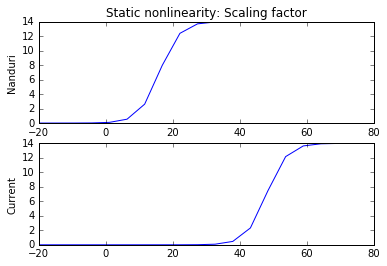

In [4]:
# Consider some pulse train with the following max amplitudes:
max_ampl = np.linspace(-20, 80, 20)

# Then the two transformations look different as a function of `max_ampl`:
plt.subplot(211)
plt.plot(max_ampl, [scale_nanduri(d) for d in max_ampl])
plt.ylabel('Nanduri')
plt.title('Static nonlinearity: Scaling factor')

plt.subplot(212)
plt.plot(max_ampl, [scale_current(d) for d in max_ampl])
plt.ylabel('Current')

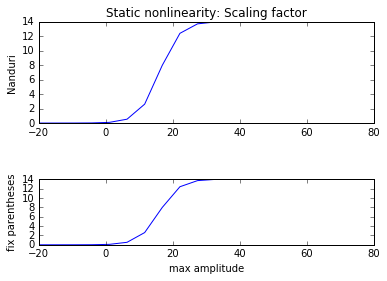

In [5]:
# However, perhaps the parentheses are misplaced?
def scale_current_parentheses(pulse_train, asymptote=14, slope=3, shift=16):
    scale_factor = (asymptote / (1 + np.exp((shift - pulse_train) / slope)))
    return scale_factor

# If we adjust the parentheses, the two functions are identical
# (as a function of `max_ampl`).
plt.subplot(211)
plt.plot(max_ampl, [scale_nanduri(d) for d in max_ampl])
plt.ylabel('Nanduri')
plt.title('Static nonlinearity: Scaling factor')

plt.subplot(313)
plt.plot(max_ampl, [scale_current_parentheses(d) for d in max_ampl])
plt.ylabel('fix parentheses')
plt.xlabel('max amplitude')

In [6]:
# Again, the two transformations are seemingly the same (except scale_nanduri is much faster):
np.sum([(scale_current_parentheses(d) - scale_nanduri(d))**2 for d in max_ampl])

0.0

In [7]:
# However, the difference between the two transformations becomes evident when considering
# a temporal signal, such as a square pulse (we'll neglect the fast response for now):
def pulse_train(freq, t, duty=0.5):
    # A `freq` Hz square pulse train sampled at times `t`
    return signal.square(2 * np.pi * freq * t, duty)

(-2, 2)

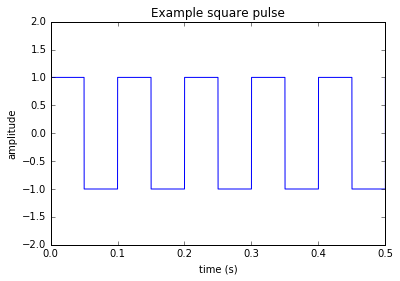

In [8]:
t_dur = 0.5  # pulse duration (s)
t_sample = .005/1000. # sampling time (s)
t = np.linspace(0, t_dur, 1/t_sample)

freq = 10 # frequency
pt = pulse_train(freq, t)

plt.plot(t, pt)
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.title('Example square pulse')
plt.ylim(-2, 2)

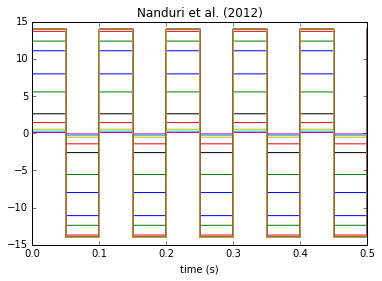

In [9]:
# Output for Nanduri et al. (2012) implementation: At every time step, the input
# current is multiplied with a scalar that depends only on the max amplitude `d`:
for d in max_ampl:
    plt.plot(t, pt / pt.max() * scale_nanduri(d*pt))
plt.xlabel('time (s)')
plt.ylim(-15, 15)
plt.title('Nanduri et al. (2012)')

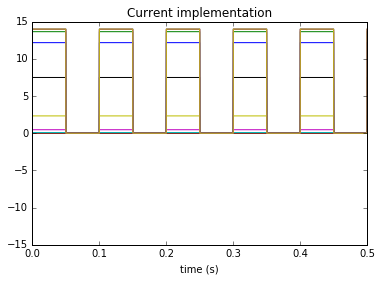

In [10]:
# Output for current implementation: There is a different "scaling factor"
# every time step, which depends on the amplitude `x` at that time, where
# f(x) ~ x/(1+exp(-x)).
# Then `pt` times `scale_current` is an element-wise product:
for d in max_ampl:
    plt.plot(t, pt / pt.max() * scale_current(d*pt))
plt.xlabel('time (s)')
plt.ylim(-15, 15)
plt.title('Current implementation')

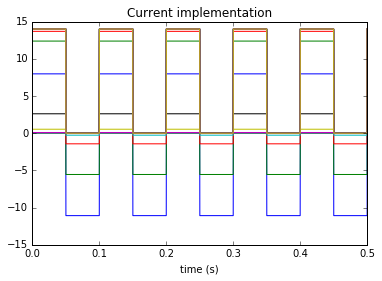

In [11]:
# Output for current implementation when parentheses are adjusted: There 
# is again a different "scaling factor" every time step, which depends
# on the amplitude `x` at that time, where f(x) ~ x/(1+exp(-x)).
# Again, `pt` times `scale_current` is an element-wise product:
for d in max_ampl:
    plt.plot(t, pt / pt.max() * scale_current_parentheses(d*pt))
plt.xlabel('time (s)')
plt.ylim(-15, 15)
plt.title('Current implementation')